In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)

In [31]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [32]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [33]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2014-7-3,水,タンドリーチキン,お楽しみメニュー,ママの会,曇,--
freq,1,43,6,12,9,53,169


In [34]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [35]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())
train["remarks"] = train["remarks"].fillna("なし")
train["event"] = train["event"].fillna("なし")
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x))

In [36]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,なし,なし,0.0,快晴,-1.0,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,なし,なし,0.0,快晴,-1.0,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,なし,なし,0.0,快晴,-1.0,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,なし,なし,0.0,快晴,-1.0,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,なし,なし,0.0,快晴,-1.0,16.1


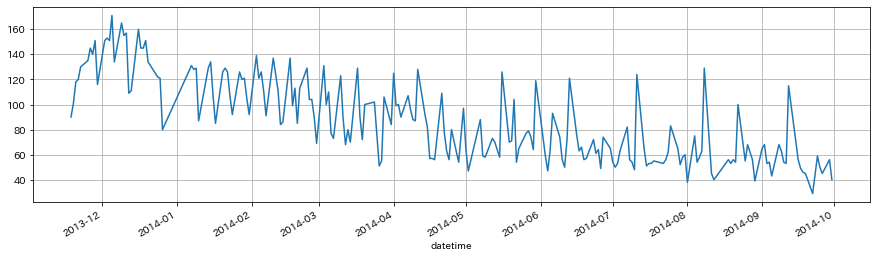

In [37]:
train.index = pd.to_datetime(train["datetime"])
train["y"].plot(figsize=(15,4),grid=True)
train = train.reset_index(drop=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

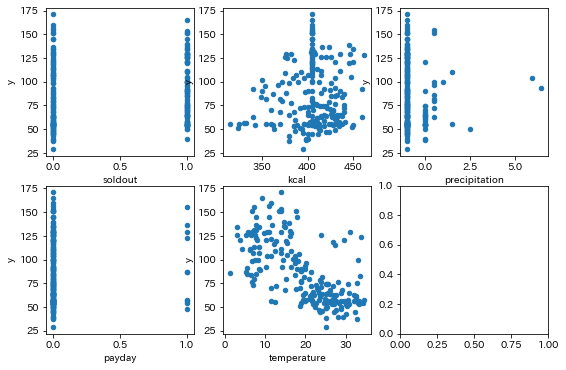

In [38]:
fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
plt.tight_layout

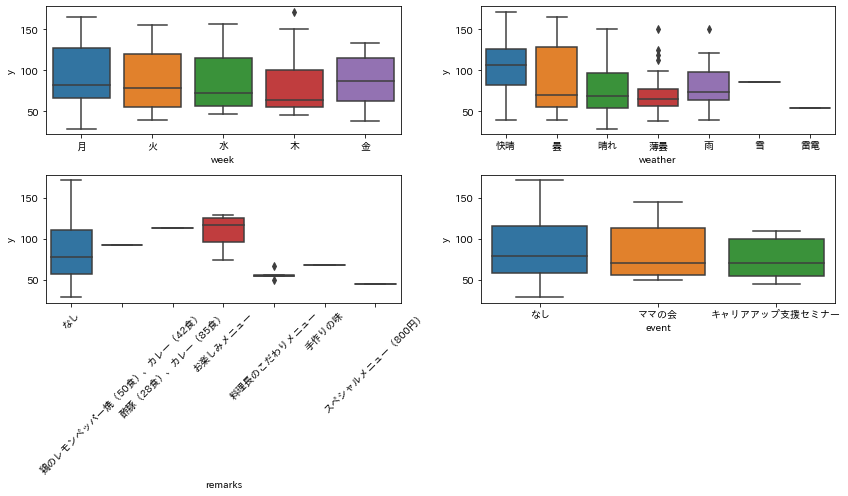

In [39]:
import seaborn as sns

fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=45)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

<AxesSubplot:xlabel='fun', ylabel='y'>

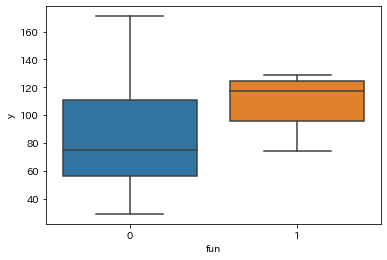

In [40]:
train["fun"] = train["remarks"].apply(lambda x : 1 if x == "お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=train)

In [41]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"],train[train["fun"]==0]["y"])
print("p",p,"stat",stat)

p 0.007057960766247775 stat 7.2581589841730345


<AxesSubplot:>

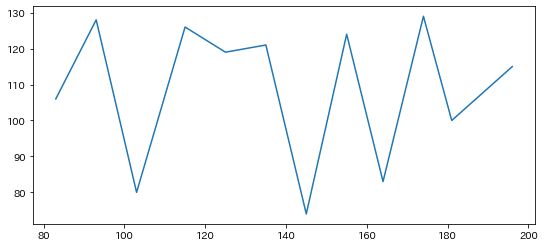

In [42]:
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(9,4))

In [43]:
train[train["fun"]==1].head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,fun
83,2014-3-28,106,金,0,キーマカレー,404.409639,お楽しみメニュー,なし,0.0,快晴,-1.0,18.5,1
93,2014-4-11,128,金,1,チキンカレー,404.409639,お楽しみメニュー,なし,0.0,快晴,-1.0,16.5,1
103,2014-4-25,80,金,0,中華丼,404.409639,お楽しみメニュー,なし,0.0,晴れ,-1.0,20.8,1
115,2014-5-16,126,金,0,ポークカレー,404.409639,お楽しみメニュー,ママの会,0.0,快晴,-1.0,23.8,1
125,2014-5-30,119,金,0,チキンカレー,404.409639,お楽しみメニュー,なし,0.0,薄曇,-1.0,26.9,1


<AxesSubplot:xlabel='curry', ylabel='y'>

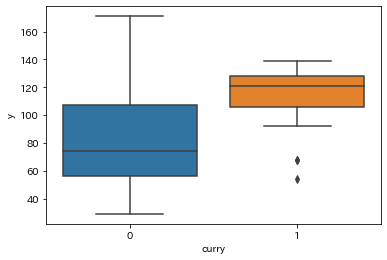

In [44]:
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
sns.boxplot(x="curry",y="y",data=train)

In [45]:
stat,p,med,tbl = median_test(train[train["curry"]==1]["y"],train[train["curry"]==0]["y"])
print("p",p,"stat",stat)

p 0.010699742900892427 stat 6.514516162828877


## モデル作成イメージ
1. 経時変化があるので時間で単回帰モデル作成
2. 非線形なので、さらにRandom Forrestを加えたモデルを作成
3. 傾向が異なると思われる2014-05-01以前は除く
4. 説明変数には "days","weather","fun","curry"を採用
5. trainとtestで含まれるパラメータが違うのでまとめて前処理する
6. trainデータでクロスバリデーションをし、

In [46]:
train["t"] =1
test["t"] =0
dat = pd.concat([train,test])  

In [47]:
dat.index = pd.to_datetime(dat["datetime"])
dat = dat["2014-05-01":]
dat = dat.reset_index(drop=True)

In [48]:
dat["days"] = dat.index
dat["fun"] = dat["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
dat["curry"] = dat["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)

In [49]:
dat.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,fun,curry,t,days
0,2014-5-1,64.0,木,0,マーボ茄子,415.0,なし,なし,0.0,晴れ,-1.0,24.0,0,0,1,0
1,2014-5-2,47.0,金,0,鶏の天ぷら,420.0,なし,なし,0.0,晴れ,-1.0,23.3,0,0,1,1
2,2014-5-7,88.0,水,1,肉じゃが,415.0,なし,なし,0.0,晴れ,-1.0,18.9,0,0,1,2
3,2014-5-8,59.0,木,0,メンチカツ,405.0,なし,なし,0.0,薄曇,-1.0,21.0,0,0,1,3
4,2014-5-9,58.0,金,1,手作りチキンカツ,434.0,なし,なし,1.0,晴れ,-1.0,23.4,0,0,1,4


In [50]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

In [51]:
def learning(trainX,y_train):
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=None)
    model1.fit(trainX["days"].values.reshape(-1,1),y_train)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))
    
    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)
    return model1, model2

In [52]:
kf = KFold(n_splits=5,random_state=None)

cols = ["weather","days","fun","curry","y"]

tr = dat[dat["t"]==1][cols]

trains = []
tests = []

for train_index, test_index in kf.split(tr):
    tr.loc[train_index,"tt"] = 1
    tr.loc[test_index,"tt"] = 0
    tr["tt"] = tr["tt"].astype(np.int)
    tmp = pd.get_dummies(tr)
    
    trainX = tmp[tmp["tt"]==1]
    del trainX["tt"]
    testX = tmp[tmp["tt"]==0]
    del testX["tt"]
    y_train = tmp[tmp["tt"]==1]["y"]
    y_test = tmp[tmp["tt"]==0]["y"]
    
    
    model1 = LR()
    model2 = RF(n_estimators=100,max_depth=4,random_state=None)
    model1.fit(trainX["days"].values.reshape(-1,1),y_train)
    pred = model1.predict(trainX["days"].values.reshape(-1,1))
    pred_sub = y_train - pred
    model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)
    
    #model1, model2 = learning(trainX, y_train)
    
    pred_train = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:, ~trainX.columns.str.match("y")])
    pred_test = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:, ~testX.columns.str.match("y")])
    
    print("TRAIN_RMSE:",MSE(y_train,pred_train)**0.5, "TRAIN_RMSE",MSE(y_test, pred_test)**0.5)
    trains.append(MSE(y_train,pred_train)**0.5)
    tests.append(MSE(y_test, pred_test)**0.5)
print("AVG")
print(np.array(trains).mean(), np.array(tests).mean())

TRAIN_RMSE: 7.599534184470631 TRAIN_RMSE 12.194454108596947


<ipython-input-52-cf5b128d345e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)
<ipython-input-52-cf5b128d345e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

TRAIN_RMSE: 8.097651357825145 TRAIN_RMSE 11.808907982902864
TRAIN_RMSE: 8.761359953861195 TRAIN_RMSE 8.842408573387173
TRAIN_RMSE: 8.287532984895739 TRAIN_RMSE 18.981961553304316
TRAIN_RMSE: 8.3547761342612 TRAIN_RMSE 9.672608634394782
AVG
8.220170923062783 12.300068170517218


<ipython-input-52-cf5b128d345e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tr["tt"] = tr["tt"].astype(np.int)
<ipython-input-52-cf5b128d345e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

In [53]:
cols = ["weather","days","fun","curry","y","t"]
tmp = pd.get_dummies(dat[cols])
trainX = tmp[tmp["t"]==1]
del trainX["t"]
testX = tmp[tmp["t"]==0]
del testX["t"]
y_train = tmp[tmp["t"]==1]["y"]
y_test = tmp[tmp["t"]==0]["y"]

RMSE 8.339872054016785


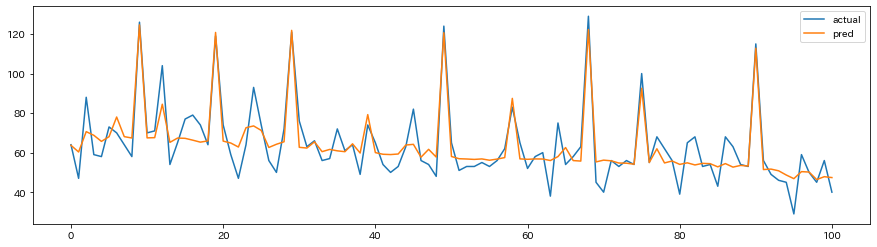

In [54]:
model1 = LR()
model2 = RF(n_estimators=100,max_depth=4,random_state=None)
model1.fit(trainX["days"].values.reshape(-1,1),y_train)
pred = model1.predict(trainX["days"].values.reshape(-1,1))
pred_sub = y_train - pred
model2.fit(trainX.iloc[:, ~trainX.columns.str.match("y")],pred_sub)

#model1, model2 = learning(trainX,y_train)

pred = model1.predict(trainX["days"].values.reshape(-1,1)) + model2.predict(trainX.iloc[:,~trainX.columns.str.match("y")])

p = pd.DataFrame({"actual":y_train,"pred":pred})
p.plot(figsize=(15,4))
print("RMSE",MSE(y_train,pred)**0.5)

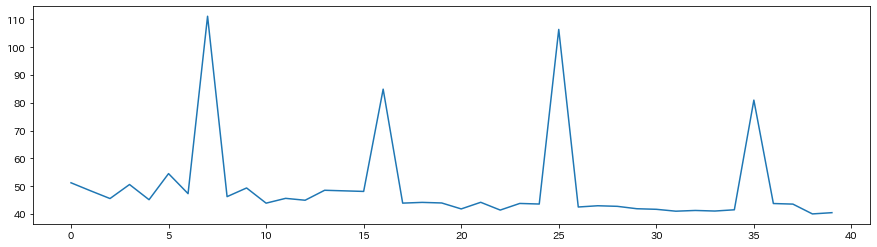

In [55]:
model1, model2 = learning(trainX,y_train)
pred = model1.predict(testX["days"].values.reshape(-1,1)) + model2.predict(testX.iloc[:,~testX.columns.str.match("y")])
plt.figure(figsize=(15,4))
plt.plot(pred)